In [1]:
import pandas as pd
df=pd.DataFrame()

In [4]:
df=pd.read_csv('IDEA.csv',index_col=0,usecols=[0,1],parse_dates=True)
# df.index.freq = 'DS'

ValueError: Invalid frequency: DS

In [5]:
df.head()

,Open
Date,
2020-08-06,11.55
2020-09-06,12.35
2020-10-06,9.70
2020-11-06,11.10
2020-12-06,8.50


<AxesSubplot:xlabel='Date'>

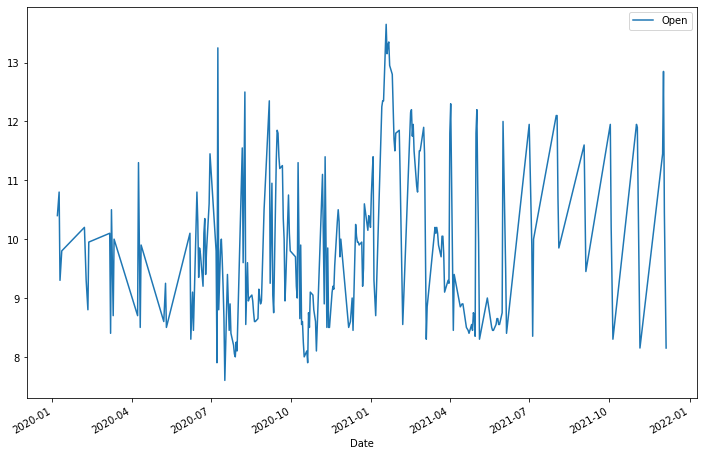

In [6]:
df.columns=['Open']
df.plot(figsize=(12,8))

In [7]:
df['Open_lastdate']=df['Open'].shift(+1)
df['Open_2lastdate']=df['Open'].shift(+2)
df['Open_3lastdate']=df['Open'].shift(+3)
df

,Open,Open_lastdate,Open_2lastdate,Open_3lastdate
Date,,,,
2020-08-06,11.55,NaN,NaN,NaN
2020-09-06,12.35,11.55,NaN,NaN
2020-10-06,9.70,12.35,11.55,NaN
2020-11-06,11.10,9.70,12.35,11.55
2020-12-06,8.50,11.10,9.70,12.35
...,...,...,...,...
2021-01-06,8.70,8.75,8.55,8.55
2021-02-06,8.55,8.70,8.75,8.55
2021-03-06,8.85,8.55,8.70,8.75


In [8]:
df=df.dropna()
df

,Open,Open_lastdate,Open_2lastdate,Open_3lastdate
Date,,,,
2020-11-06,11.10,9.70,12.35,11.55
2020-12-06,8.50,11.10,9.70,12.35
2020-06-15,10.80,8.50,11.10,9.70
2020-06-16,10.30,10.80,8.50,11.10
2020-06-17,9.35,10.30,10.80,8.50
...,...,...,...,...
2021-01-06,8.70,8.75,8.55,8.55
2021-02-06,8.55,8.70,8.75,8.55
2021-03-06,8.85,8.55,8.70,8.75


In [9]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [11]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)

In [12]:
import numpy as np
x1,x2,x3,y=df['Open_lastdate'],df['Open_2lastdate'],df['Open_3lastdate'],df['Open']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 9.7  12.35 11.55]
 [11.1   9.7  12.35]
 [ 8.5  11.1   9.7 ]
 [10.8   8.5  11.1 ]
 [10.3  10.8   8.5 ]
 [ 9.35 10.3  10.8 ]
 [ 9.85  9.35 10.3 ]
 [ 9.75  9.85  9.35]
 [ 9.2   9.75  9.85]
 [10.1   9.2   9.75]
 [10.35 10.1   9.2 ]
 [ 9.4  10.35 10.1 ]
 [ 9.8   9.4  10.35]
 [10.6   9.8   9.4 ]
 [11.45 10.6   9.8 ]
 [10.4  11.45 10.6 ]
 [10.2  10.4  11.45]
 [10.1  10.2  10.4 ]
 [10.1  10.1  10.2 ]
 [ 9.8  10.1  10.1 ]
 [ 9.6   9.8  10.1 ]
 [ 9.25  9.6   9.8 ]
 [ 9.2   9.25  9.6 ]
 [10.    9.2   9.25]
 [ 9.65 10.    9.2 ]
 [ 9.2   9.65 10.  ]
 [ 8.65  9.2   9.65]
 [ 7.6   8.65  9.2 ]
 [ 9.4   7.6   8.65]
 [ 8.95  9.4   7.6 ]
 [ 8.45  8.95  9.4 ]
 [ 8.9   8.45  8.95]
 [ 8.4   8.9   8.45]
 [ 8.2   8.4   8.9 ]
 [ 8.05  8.2   8.4 ]
 [ 8.    8.05  8.2 ]
 [ 8.25  8.    8.05]
 [ 8.1   8.25  8.  ]
 [ 8.4   8.1   8.25]
 [ 8.7   8.4   8.1 ]
 [ 8.6   8.7   8.4 ]
 [ 8.3   8.6   8.7 ]
 [ 7.9   8.3   8.6 ]
 [ 9.    7.9   8.3 ]
 [ 8.9   9.    7.9 ]
 [ 8.6   8.9   9.  ]
 [ 8.95  8.6   8.9 ]
 [ 9.    8.95

In [13]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [15]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

<ipython-input-15-293373e02e7d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

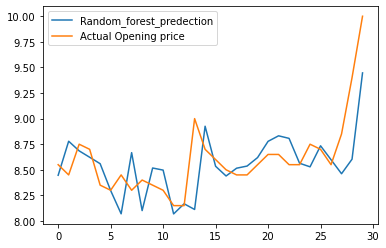

In [17]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.plot(pred,label='Random_forest_predection')
plt.plot(y_test,label='Actual Opening price')
plt.legend(loc="upper left")
plt.show()

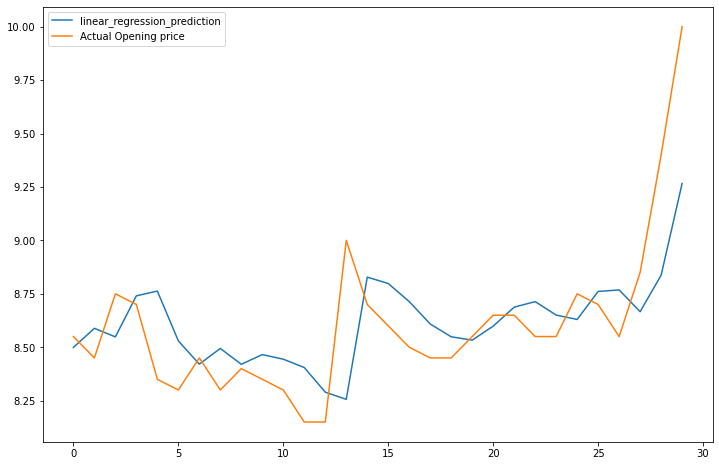

In [18]:
 lin_pred=lin_model.predict(X_test)
 import matplotlib.pyplot as plt   
 plt.rcParams["figure.figsize"]=(12,8)
 plt.plot(lin_pred,label="linear_regression_prediction")
 plt.plot(y_test,label='Actual Opening price')
 plt.legend(loc="upper left")
 plt.show()
 

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))
print(rmse_rf)
print(rmse_lr)

0.3021198851449542
0.26647413157118577
